## Coding Exercise #0302

### 1. Linear regression and diagnostics:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_boston
from sklearn import metrics
import pandas as pd
import numpy as np


In [26]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [28]:
X = pd.DataFrame(data)
Y = pd.DataFrame(target)

column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

X.columns = column_names[:-1]  # all columns except the last one
Y.columns = [column_names[-1]]  # only the last column


#### 1.1. Load the 'Boston' dataset from Scikit-Learn:

In [2]:
# Display the description on the data.
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [3]:
# Display the description on the data.
print(Y)

     MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


#### 1.2. Convert the data into a DataFrame and then explore:

In [30]:
df = pd.DataFrame(np.append(X,Y,axis = 1), columns = column_names)

In [32]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
# Descriptive statistics of the variables (columns).
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Q: Pair-wise correlation matrix.
np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


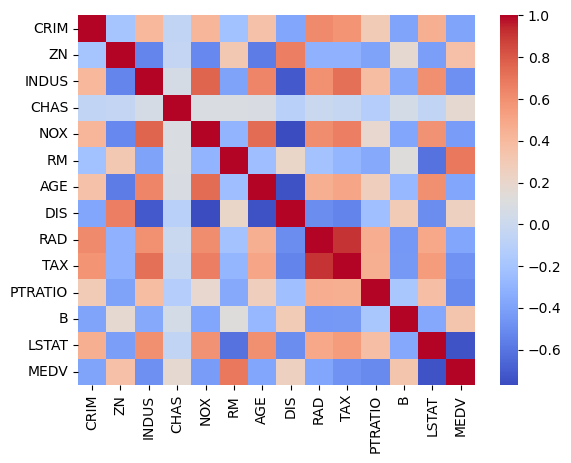

In [11]:
# Visualize the correlation matrix.
Q: sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

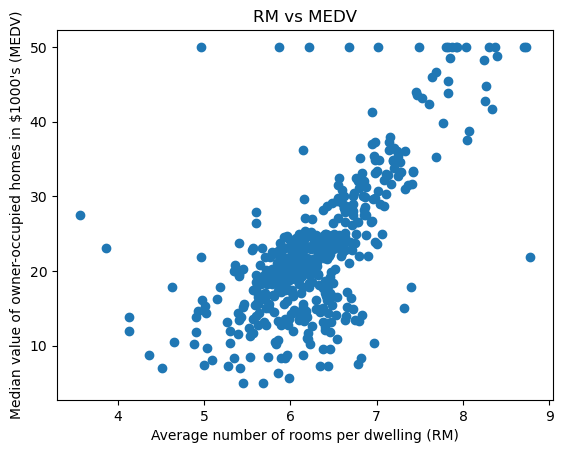

In [12]:
# In the Boston housing dataset, 'RM' is the average number of rooms per dwelling and 'PRICE'(MEDV) is the Median value of owner-occupied homes in $1000's. 
# Q: Visualize RM vs PRICE. (e.g., we can visualize the relationship between these two variables using a scatter plot)

plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000\'s (MEDV)')
plt.title('RM vs MEDV')
plt.show()

#### 1.3. Train by linear regression:

In [13]:
# Q: Train.
lm = LinearRegression(fit_intercept=True)
lm.fit(X,Y)

LinearRegression()

In [14]:
# Q: The intercept.
lm.intercept_

array([36.45948839])

In [15]:
# Q: The rest of coefficients (parameters).
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [16]:
# Display the parameters as a DataFrame.

# Get the intercept and parameters as data
data = np.append(lm.intercept_, lm.coef_)

# Create a pandas DataFrame
parameters_df = pd.DataFrame(data, columns=['Parameters'], index=['Intercept'] + column_names[:-1])

# Print the DataFrame
print(parameters_df)

           Parameters
Intercept   36.459488
CRIM        -0.108011
ZN           0.046420
INDUS        0.020559
CHAS         2.686734
NOX        -17.766611
RM           3.809865
AGE          0.000692
DIS         -1.475567
RAD          0.306049
TAX         -0.012335
PTRATIO     -0.952747
B            0.009312
LSTAT       -0.524758


#### 1.4. Diagnostics:

In [17]:
# In-sample prediction.
predY = lm.predict(X)

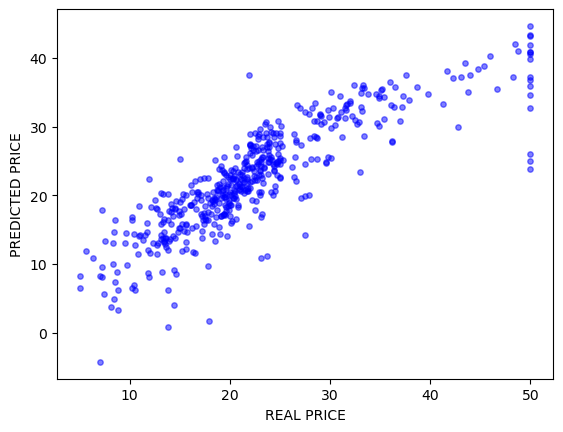

In [18]:
# Q: Display real Y vs predicted Y.
plt.scatter(Y,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [19]:
# Coefficient of determination (R^2):
rsq_AllData = lm.score(X,Y)
print(rsq_AllData)

0.7406426641094095


#### 1.5. In-sample (training data) and out-of-sample (test data) testing:

In [20]:
# Q: Split the dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [23]:
# predY_in = in-sample prediction of Y.
# predY_out = out-of-sample prediction of Y.
lm = LinearRegression()
lm.fit(X_train,Y_train)
predY_in = lm.predict(X_train)
predY_out = lm.predict(X_test)

In [24]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, predY_in)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, predY_out)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, predY_in))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, predY_out))))

In-sample MSE is      : 20.18433663987316
Out-of-sample MSE is  : 28.405854810508202
--------------------------------------------------
In-sample RMSE is     : 4.492698146979514
Out-of-sample RMSE is : 5.329714327288865


NOTE: In-sample error are a bit smaller but not by much.

In [25]:
# Coefficient of determination (R^2):
rsq_Test = lm.score(X_test,Y_test)
print(rsq_Test)

0.6485645742370708


In [30]:
# Show the intercept.
lm.intercept_

array([28.98127039])

In [31]:
# Show other parameters.
lm.coef_

array([[-1.00993843e-01,  3.99582498e-02,  7.53760168e-02,
         2.64563972e-01, -1.43409174e+01,  4.83318293e+00,
        -7.44105854e-03, -1.32674018e+00,  2.73495492e-01,
        -1.30440007e-02, -9.56625955e-01,  6.42468925e-03,
        -4.86570773e-01]])

#### 1.6. Residual analysis:

In [32]:
# Q: Calculate residual.
residual = Y_train - predY_in

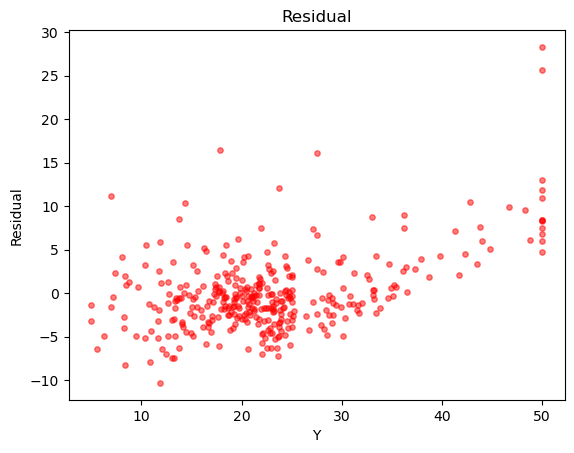

<Axes: xlabel='MEDV', ylabel='MEDV'>

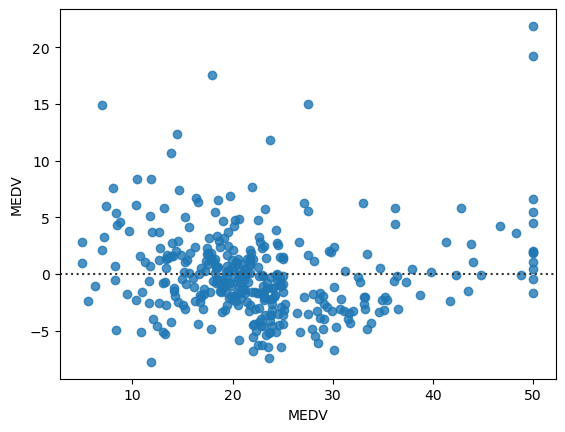

In [33]:
# Q: Can you check "visually" that the mean = 0 and variance = constant?
plt.scatter(Y_train,residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

sns.residplot(x=Y_train, y=residual)


C:\Users\Nando\AppData\Local\Temp\ipykernel_15612\1307433590.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins=50, color='green').set_title("Residual Histogram")


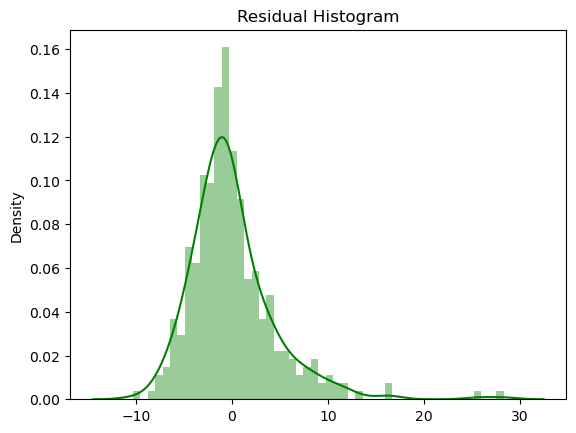

In [34]:
# Q: Are the residuals normally distributed centered around 0?
sns.distplot(residual, bins=50, color='green').set_title("Residual Histogram")
plt.show()

#### 1.7. Given a new set of values for the explanatory variables, predict the response:  
- CRIM     : 0.03
- ZN       : 0.0
- INDUS    : 13.0
- CHAS     : 0.0
- NOX      : 0.4
- RM       : 4.3
- AGE      : 23.5
- DIS      : 1.9
- RAD      : 1.0
- TAX      : 273.0
- PTRATIO  : 18.0 
- B        : 380.0
- LSTAT    : 7.5

In [35]:
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.4, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  # Reshaped as a row.
Y_pred_new = lm.predict(X_new)
print(np.round(Y_pred_new[0,0],3))

20.594


C:\Users\Nando\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 1.7 Regularized regressions


#### 1.7.1 Ridge regression

In [36]:
from sklearn.linear_model import Ridge, Lasso

In [37]:
lambdaRange = range(1,100) # Lambda = 0 -> same as lm()

In [40]:
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.
for aLambda in lambdaRange:
    ridge = Ridge(aLambda)
    ridge.fit(X_train,Y_train)                               # Train with the training set.
    rsq = ridge.score(X_test,Y_test)                         # Calculate R^2 with the testing set. 
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
ridge = Ridge(bestLambda)                                    # Final run with the bestLambda.
ridge.fit(X,Y)                                                  

Lambda =  1  and  R^2 =  0.639
Lambda =  19  and  R^2 =  0.64
Lambda =  20  and  R^2 =  0.64
Lambda =  21  and  R^2 =  0.64
Lambda =  22  and  R^2 =  0.641
Lambda =  23  and  R^2 =  0.641
Lambda =  24  and  R^2 =  0.642
Lambda =  25  and  R^2 =  0.642
Lambda =  26  and  R^2 =  0.642
Lambda =  27  and  R^2 =  0.643
Lambda =  28  and  R^2 =  0.643
Lambda =  29  and  R^2 =  0.643
Lambda =  30  and  R^2 =  0.644
Lambda =  31  and  R^2 =  0.644
Lambda =  32  and  R^2 =  0.644
Lambda =  33  and  R^2 =  0.645
Lambda =  34  and  R^2 =  0.645
Lambda =  35  and  R^2 =  0.645
Lambda =  36  and  R^2 =  0.646
Lambda =  37  and  R^2 =  0.646
Lambda =  38  and  R^2 =  0.646
Lambda =  39  and  R^2 =  0.646
Lambda =  40  and  R^2 =  0.647
Lambda =  41  and  R^2 =  0.647
Lambda =  42  and  R^2 =  0.647
Lambda =  43  and  R^2 =  0.647
Lambda =  44  and  R^2 =  0.648
Lambda =  45  and  R^2 =  0.648
Lambda =  46  and  R^2 =  0.648
Lambda =  47  and  R^2 =  0.648
Lambda =  48  and  R^2 =  0.648
Lambda =  49

Ridge(alpha=99)

In [41]:
# Show the intercept.
ridge.intercept_


array([36.30830556])

In [42]:
# Show other parameters.
ridge.coef_

array([[-1.02209944e-01,  5.44742143e-02, -5.28129441e-02,
         6.42935678e-01, -2.65582452e-01,  2.34402685e+00,
         1.10913912e-03, -1.15437289e+00,  3.15144929e-01,
        -1.58464742e-02, -8.29071799e-01,  9.39854180e-03,
        -6.60098838e-01]])

#### 1.7.2 Lasso regression

In [43]:
lambdaRange = range(1,100)

In [44]:
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.
for aLambda in lambdaRange:
    lasso = Lasso(aLambda)
    lasso.fit(X_train,Y_train)                               # Train with the training set.
    rsq = lasso.score(X_test,Y_test)                         # Calculate R^2 with the testing set. 
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
lasso = Lasso(bestLambda)                                    # Final run with the bestLambda.
lasso.fit(X,Y) 

Lambda =  1  and  R^2 =  0.64


Lasso(alpha=1)

In [45]:
lambdaRange = np.arange(0.01, 1, 0.01)

In [46]:
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.
for aLambda in lambdaRange:
    lasso = Lasso(aLambda)
    lasso.fit(X_train,Y_train)                               # Train with the training set.
    rsq = lasso.score(X_test,Y_test)                         # Calculate R^2 with the testing set. 
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
lasso = Lasso(bestLambda)                                    # Final run with the bestLambda.
lasso.fit(X,Y) 

Lambda =  0.01  and  R^2 =  0.642
Lambda =  0.5  and  R^2 =  0.642
Lambda =  0.51  and  R^2 =  0.643
Lambda =  0.52  and  R^2 =  0.643
Lambda =  0.53  and  R^2 =  0.643
Lambda =  0.54  and  R^2 =  0.643
Lambda =  0.55  and  R^2 =  0.643
Lambda =  0.56  and  R^2 =  0.643
Lambda =  0.5700000000000001  and  R^2 =  0.643
Lambda =  0.5800000000000001  and  R^2 =  0.643
Lambda =  0.59  and  R^2 =  0.644
Lambda =  0.6  and  R^2 =  0.644
Lambda =  0.61  and  R^2 =  0.644
Lambda =  0.62  and  R^2 =  0.644
Lambda =  0.63  and  R^2 =  0.644
Lambda =  0.64  and  R^2 =  0.644
Lambda =  0.65  and  R^2 =  0.644
Lambda =  0.66  and  R^2 =  0.644
Lambda =  0.67  and  R^2 =  0.644
Lambda =  0.68  and  R^2 =  0.644


Lasso(alpha=0.68)

In [47]:
# Show the intercept.
lasso.intercept_

array([35.56568416])

In [48]:
# Show other parameters.
lasso.coef_

array([-0.07602762,  0.04950135, -0.        ,  0.        , -0.        ,
        1.94359097,  0.00977364, -0.83677158,  0.27358795, -0.01545889,
       -0.74611101,  0.00903641, -0.69429444])